# Square Wave Generator
A *square wave* is a periodic waveform that alternates between two discrete values. 

Here's an example square wave that is generated using a simple Python function.

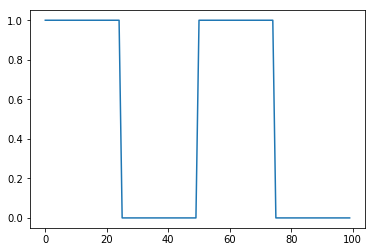

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

x = np.arange(0, 100)

def square(x):
    return (x % 50) < 25

plt.plot(x, square(x))

In [2]:
import magma as m
m.set_mantle_target("ice40")

To implement our square wave in magma, we start by importing the `IceStick` module from `loam`. We instance the `IceStick` and turn on the `Clock` and `J3[0]` (configured as an output).

Now we'll use `magma` and `mantle` to implement a square wave generator.
Since our square wave just toggles between 0 and 1 using a fixed period, we can use any bit in a synchronous counter to implement it (choosing a certain counter bit will change the period).

In [3]:
import mantle
from loam.boards.icestick import IceStick

icestick = IceStick()
icestick.Clock.on()
icestick.J3[0].output().on()

main = icestick.main()

counter = mantle.Counter(32)
square = counter.O[9]

m.wire( square, main.J3 )

import lattice ice40
import lattice mantle40


Compile and build the circuit.

In [4]:
m.compile('build/square', main)

compiling FullAdder
compiling Add32Cout
compiling Register32
compiling Counter32
compiling main


In [5]:
%%bash
cd build
cat square.pcf
yosys -q -p 'synth_ice40 -top main -blif square.blif' square.v
arachne-pnr -q -d 1k -o square.txt -p square.pcf square.blif 
icepack square.txt square.bin
iceprog square.bin

/Users/hanrahan/git/magmathon/notebooks/signal-generator/solutions/build
set_io J3 62
set_io CLKIN 21


init..
cdone: high
reset..
cdone: low
flash ID: 0x20 0xBA 0x16 0x10 0x00 0x00 0x23 0x51 0x73 0x10 0x22 0x00 0x26 0x00 0x42 0x06 0x06 0x15 0x62 0xB8
file size: 32220
erase 64kB sector at 0x000000..
programming..
reading..
VERIFY OK
cdone: high
Bye.


We can wire up GPIO pin 62 to a logic analyzer to verify that our circuit produces the correct square waveform.

![](images/square.jpg)